# Poisson modeling using ARIMA models

In [ ]:
import math
import numpy
import matplotlib.pyplot as plt
from src.poisson import Poisson
from src.arima import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Example of our Poisson process

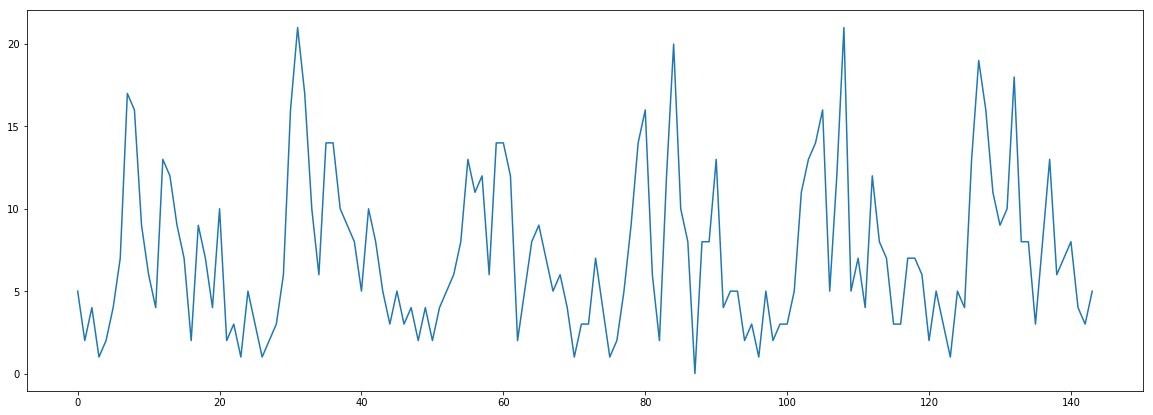

In [2]:
p = Poisson()
example = p.generate(6)

plt.figure(figsize=(20,7))
plt.plot(example)

### Apply the ARIMA model to a new data set that is more varied

In [3]:
a1 = p.generate(4)
a2 = p.generate(2,2)
a3 = p.generate(4)
a4 = p.generate(1,2)
actual = numpy.concatenate((a1,a2,a3,a4))

arima = ARIMA()
pred = arima.predict(actual)

### Plot the prediction

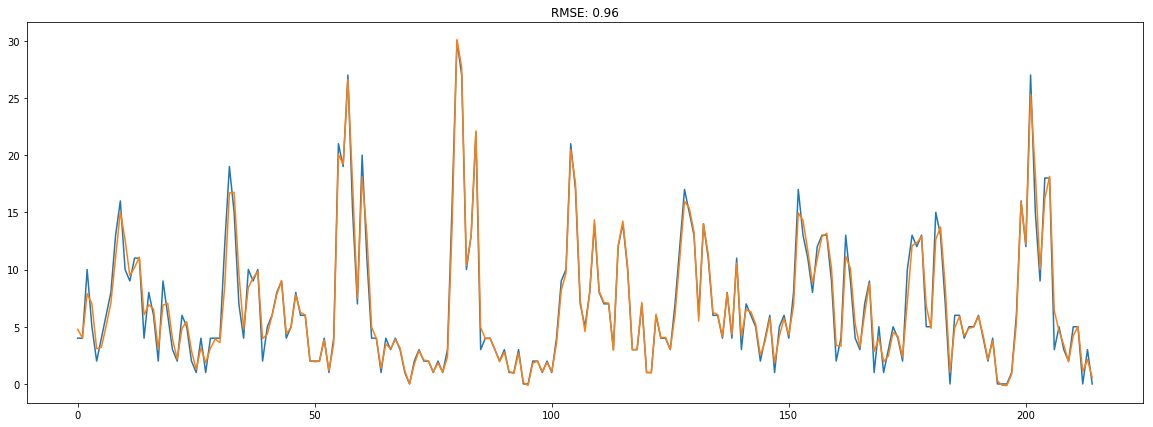

In [4]:
actual = actual[47:-2]
error = math.sqrt(mean_squared_error(pred, actual))

plt.figure(figsize=(20,7))
plt.title('RMSE: {:.2f}'.format(error))
plt.plot(actual)
plt.plot(pred)

Moral of the story is that ARIMA methods have significantly more coupling to the problem.  Moreover, there is a lot of work that is required to identify whether or not the specifics of the ARIMA model are appropriate (e.g. residual analysis, use of Akaike information criterion, etc.), that makes dynamic tuning of the model more challenging.  On the other hand, since the method is more coupled, it tracks with new data quite well.  Moreover, it is significantly faster to fit the model.  Biggest problem is convergence issues, but given the simplicity of the data, this isn't really a setback.  The further the lookback, the overwhelmingly better the results.